In [1]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import gensim
from gensim.models.word2vec import LineSentence

In [16]:
import pandas as pd
df = pd.read_csv('./final_groupby_15.csv')
df.head(1)

,author,article,keywords
0,*GENISOFI*,因參加|會員活動|贏得升等套房住宿獎勵卷|適用於|系列所有飯店|艾美酒店|喜來登|福朋四季等...,"['官網', '飯店', '客房', '奇景', '含稅', '過會員', '早餐', '方..."


In [ ]:
# df = df.drop_duplicates(subset='content', keep='first', ignore_index=True)
# df.shape

In [ ]:
# df = df.drop_duplicates(subset='aut_id', keep='first', ignore_index=True)
# df.shape

In [ ]:
# df['keywords']=df['keywords'].apply(lambda x: x.replace('[','').replace(']','').replace("'",""))
# df

In [17]:
df['keywords']=df['keywords'].apply(lambda x:eval(x))
print(type(df.iloc[0,2]))

<class 'list'>


In [18]:
datas =[words for words in df['keywords']]
print(datas[:5])

[['官網', '飯店', '客房', '奇景', '含稅', '過會員', '早餐', '方式', '有意者', '事項', '信討論', '報價', '會員', '訂房', '網路'], ['景色', '公園', '國光', '歸途', '媽祖廟', '建築', '親水', '觀光', '藝術品', '熱水', '年老', '火車', '腳踏車', '門票', '廟口'], ['空間', '朋友', '花草', '旅店', '房間', '名產', '友善', '旅人', '經驗', '親切', '不錯', '人員', '文章', '雙人', '方便'], ['壽司', '美食', '日本料理', '食記', '空間', '感覺', '雲品', '早餐', '舒適', '酒店', '飯店', '粉色', '游泳池', '聚餐', '中心'], ['五房', '阡陌', '房間', '民宿', '大片', '所欲', '草原', '烤肉', '空調', '夜市', '價錢', '簡單', '壯圍', '天堂', '房子']]


In [19]:
#訓練
model = Word2Vec(datas, vector_size=100, min_count=1, workers=7, window =3, sg = 1)
# model.save('w2v_model_tpk30')

編寫文本轉向量方法，將一段文字的向量用各詞向量平均值來表示，爲50維向量

In [20]:
def buildWordVector(article_w2v, text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text:
        #print word
        try:
            vec += article_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            print (word)
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
print(type(df['keywords'][0]))

In [21]:
result = buildWordVector(model, df.loc[0]['keywords'] , 100)
print(result)
for idx in range (1, len(df)):
    result = np.concatenate((result, buildWordVector(model, df.loc[idx]['keywords'] , 100)), axis=0)

[[ 3.64452212e-02  1.79769702e-01 -1.81099161e-02  1.55391887e-03
   8.67592494e-03 -2.40652952e-01  1.93229651e-01  4.21717838e-01
  -2.39224028e-01 -1.44876246e-01  3.78346525e-02 -2.29510455e-01
   3.60681386e-02  1.65154783e-01  3.44490213e-02  2.79001892e-05
   1.45967233e-01 -1.69809258e-01 -8.87424602e-02 -4.20734928e-01
   1.01422986e-01  3.38880187e-02  1.91568219e-01 -1.42997153e-01
  -1.41156806e-02  3.76033685e-03 -1.38579800e-01 -1.99906008e-01
  -1.73670367e-01  2.97250775e-02  1.91595544e-01 -7.66008672e-02
   1.88476428e-01 -3.89283506e-01 -3.29606765e-02  2.16111155e-01
  -1.95009321e-02 -1.24283970e-01 -1.09784425e-01 -2.35116647e-01
   6.23550165e-02 -1.20353663e-01  5.28511483e-02  1.05400214e-02
   2.23967215e-01 -3.63878004e-02 -2.26527766e-01 -9.01073895e-02
   8.38252623e-02  9.26600937e-02  9.16723993e-02 -9.91507947e-02
  -1.07916440e-01  3.89211502e-02 -5.58384611e-02  8.20287595e-02
   1.50251973e-01  7.83776406e-02 -1.71924732e-01  6.45489519e-02
   5.31292

In [22]:
#把series 轉換成dataframe格式，並且將五十維的特徵都賦值
# vectors = pd.DataFrame(result, columns = ["x1","x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30", "x31", "x32", "x33", "x34", "x35", "x36", "x37", "x38" ,"x39", "x40", "x41", "x42", "x43" ,"x44", "x45", "x46" ,"x47", "x48", "x49", "x50"])
# vectors.head(1)
#把series 轉換成dataframe格式，並且將三十維的特徵都賦值
# vectors = pd.DataFrame(result, columns = ["x1","x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30"])
# vectors.head(1)
vectors = pd.DataFrame(result, columns = ["x1","x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30", "x31", "x32", "x33", "x34", "x35", "x36", "x37", "x38" ,"x39", "x40", "x41", "x42", "x43" ,"x44", "x45", "x46" ,"x47", "x48", "x49", "x50",
                                         "x51","x52", "x53", "x54", "x55", "x56", "x57", "x58", "x59", "x60","x61", "x62", "x63", "x64", "x65", "x66", "x67", "x68", "x69", "x70", "x71", "x72", "x73", "x74", "x75", "x76", "x77", "x78", "x79", "x80", "x81", "x82", "x83", "x84", "x85", "x86", "x87", "x88" ,"x89", "x90", "x91", "x92", "x93" ,"x94", "x95", "x96" ,"x97", "x98", "x99", "x100"])
# vectors.head(1)

In [23]:
#合併dataframe
data = pd.concat([df, vectors], axis = 1)
data.head(1)
# print(data.shape)

,author,article,keywords,x1,x2,x3,x4,x5,x6,x7,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,*GENISOFI*,因參加|會員活動|贏得升等套房住宿獎勵卷|適用於|系列所有飯店|艾美酒店|喜來登|福朋四季等...,"[官網, 飯店, 客房, 奇景, 含稅, 過會員, 早餐, 方式, 有意者, 事項, 信討論...",0.036445,0.17977,-0.01811,0.001554,0.008676,-0.240653,0.19323,...,0.255171,0.054602,0.008792,-0.042369,0.202101,0.102021,0.064876,-0.10298,0.076306,0.071267


In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
dt= data.drop(['article', 'keywords', 'author'],axis=1)

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.cluster import KMeans
from sklearn import metrics, manifold
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Source Han Sans TW']
plt.rc('legend', fontsize=16)

import random

In [ ]:
nd_data = dt.to_numpy()
# 降維
# pca_data = PCA(n_components=2).fit_transform(nd_data)
reduced_data  = manifold.TSNE(n_components=2,init="pca",random_state=0).fit_transform(nd_data)

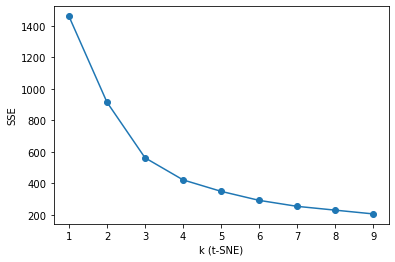

In [26]:
SSE =[]
for k in range(1,10):
    model_k = KMeans(n_clusters=k)
    model_k.fit(dt)
    SSE.append(model_k.inertia_)
X = range(1,10)
plt.xlabel('k (t-SNE)')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show()

In [27]:
#按5類分
kms5=KMeans(n_clusters=5)
y5=kms5.fit_predict(dt)
# print(y5)
y5=pd.DataFrame(y5, columns = ['kind-5'])
# #按4類分
kms4=KMeans(n_clusters=4)
y4=kms4.fit_predict(dt)
y4 = pd.DataFrame(y4, columns = ['kind-4'])
# 按3類分
kms3=KMeans(n_clusters=3)
y3=kms3.fit_predict(dt)
y3 = pd.DataFrame(y3, columns = ['kind-3'])

計算所有樣本的平均輪廓係數

In [29]:
from sklearn.metrics import silhouette_score
score_3 = silhouette_score(dt, y3)
print("cluster = 3, score = ",score_3)
score_4 = silhouette_score(dt, y4)
print("cluster = 4, score = ",score_4)
score_5 = silhouette_score(dt, y5)
print("cluster = 5, score = ",score_5)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cluster = 3, score =  0.43159204698364195


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cluster = 4, score =  0.3713930480215379


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cluster = 5, score =  0.3435616989656187


In [ ]:
data = pd.concat([df, y3], axis = 1)
# data = pd.concat([data, y5], axis = 1)
# data = pd.concat([data, y3], axis = 1)

In [ ]:
data

In [ ]:
df_author = pd.read_csv('./mySQL_author.csv')
df_author = df_author[['aut_id', 'author']]

In [ ]:
df_author['author'] =df_author['author'].astype('str')
data['author'] = data['author'].astype('str')
# df_info
df=data.merge(df_author,on=['author'],how='left')
df

In [ ]:
df = df[['author', 'aut_id', 'kind-3']]
df

In [ ]:
df.to_csv('./author_group.csv', index=None)

In [ ]:
print(data.loc[data['kind-4']==0].shape)
print(data.loc[data['kind-4']==1].shape)
print(data.loc[data['kind-4']==2].shape)
print(data.loc[data['kind-4']==3].shape)

In [ ]:
print(data.loc[data['kind-3']==0].shape)
print(data.loc[data['kind-3']==1].shape)
print(data.loc[data['kind-3']==2].shape)

In [ ]:
print(data.loc[data['kind-5']==0].shape)
print(data.loc[data['kind-5']==1].shape)
print(data.loc[data['kind-5']==2].shape)
print(data.loc[data['kind-5']==3].shape)
print(data.loc[data['kind-5']==4].shape)

In [ ]:
# data = data[['author', 'kind-4', 'kind-5']]
# data.to_csv('./check.csv')

In [ ]:
data_0 = data[data['kind-3']==0]
data_1 = data[data['kind-3']==1]
data_2 = data[data['kind-3']==2]
data_0.head(1)

In [ ]:
def countwords(row):
    output_list = []
    output_dic = {}
    for l in row:
        for j in l:
            output_list.append(j)       
    
    for item in output_list:
        output_dic[item] = output_list.count(item)
    return sorted(output_dic.items(), key=lambda x:x[1], reverse=True)[:500]
    # print(f"the {item} has found {y.count(item)}")


In [ ]:
酒廊、隔音、親子、健身房、泡湯、溜滑梯、浪漫、熱心、備品、日式、嬰兒、友善

In [ ]:
print(countwords(data_0['keywords']))

朋友、女生、下午茶、中式、浪漫、雙人、西式、客廳、氣氛、啤酒、少女

In [ ]:
print(countwords(data_1['keywords']))

市區、便宜、平價、汽車、優質、完美、背包客、車站、木地板、好康、海景

In [ ]:
print(countwords(data_2['keywords']))

In [ ]:
group_0 =('酒廊','隔音','親子','健身房','溜滑梯','熱心','備品','日式','嬰兒','友善')
group_1 =('朋友','女生','下午茶','中式','浪漫','雙人','西式','客廳','氣氛','啤酒')
group_2 =('市區','便宜','平價','汽車','優質','完美','背包客','車站','木地板','好康')

a = pd.Series(group_0, dtype=str, name='0')
b = pd.Series(group_1, dtype=str, name='1')
c = pd.Series(group_2, dtype=str, name='2')
datas = pd.concat([a, b, c], axis = 1)
datas = datas.T
datas['tags'] = datas.values.tolist()
datas = datas[['tags']]
datas.to_csv('./group_tags.csv', index=None)

# Test

In [ ]:
a = ['早餐', '日式', '親子', '友善', '安靜']
b = buildWordVector(model, a , 50)
print(b)
# y4 = pd.DataFrame(y4, columns = ['kind-4'])